In [1]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannotations.Annotator import Annotator

In [2]:
input_file = 'HepG2_SDOC_represses_result.tsv'
infos = pd.read_csv(input_file, sep="\t", header=None)
infos

,0,1,2,3,4,5
0,chr1,2190000,3430000,2,0.437330,0.945192
1,chr1,3430000,5990000,2,1.050111,0.838495
2,chr1,5990000,6040000,0,0.003852,-0.270799
3,chr1,6040000,6700000,0,0.203751,-0.270799
4,chr1,6700000,7660000,0,0.222518,-0.270799
...,...,...,...,...,...,...
2637,chr9,136730000,136790000,6,0.006576,3.025970
2638,chr9,136790000,136940000,0,0.024912,-0.270799
2639,chr9,136940000,137120000,6,0.046040,2.029849
2640,chr9,137120000,137280000,9,0.032555,2.376643


In [3]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

figure_size = dict(
    ultra=45,
    large=35,
    middle=20,
    small=10,
    very_small=5
)

def set_plt(figsize=(10, 10)):
    params = {'axes.titlesize': figure_size['ultra'],
              'legend.fontsize': figure_size['middle'],
              'figure.figsize': figsize,
              'axes.labelsize': figure_size['ultra'],
              'xtick.labelsize': figure_size['ultra'],
              'ytick.labelsize': figure_size['ultra'],
              'figure.titlesize': figure_size['ultra'],
              'lines.linewidth': figure_size['very_small']}
    plt.rcParams.update(params)

    font = {'family': 'sans-serif', 'sans-serif': 'Arial'}
    plt.rc('font', **font)

def set_Border(axes):
    axes.spines['top'].set_color('none')
    axes.spines['right'].set_color('none')
    axes.spines['bottom'].set_color('black')
    axes.spines['left'].set_color('black')
    axes.spines['bottom'].set_linewidth(figure_size['very_small'])
    axes.spines['left'].set_linewidth(figure_size['very_small'])
    axes.tick_params(axis='both', width=figure_size['very_small'], length=figure_size['small'])

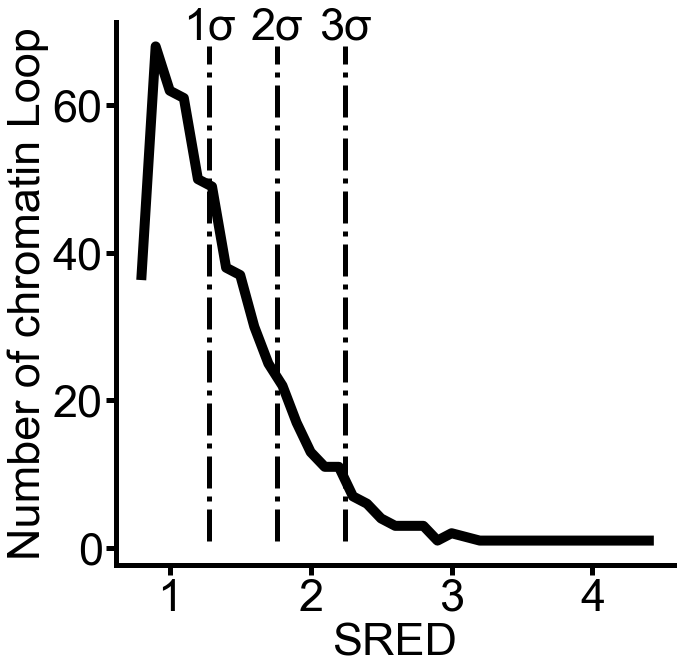

In [4]:
result = infos.loc[infos[3]>0].loc[:,5].round(1).value_counts().sort_index()
x = result.index.tolist()
y = result.values.tolist()

_sigma = infos.loc[infos[3]>0].loc[:,5].std()
_min = infos.loc[infos[3]>0].loc[:,5].min()
_thresholds = [_min+i*_sigma for i in range(1, 4)]

set_plt()
fig, axes = plt.subplots(nrows=1, ncols=1, sharey=True)
axes.grid(False)
axes.plot(x, y, color='black', linewidth=figure_size['small'])
for i in range(3):
    axes.vlines(
        _thresholds[i], result.values.min(), result.values.max(),
        colors='black', linestyles='dashdot'
    )
    axes.text(
        _thresholds[i], result.values.max()+1, '{}σ'.format(i+1),
        fontsize=figure_size['ultra'], horizontalalignment='center'
    )

set_Border(axes)
plt.tick_params(colors='black', bottom=True, left=True, labelsize=figure_size['ultra'])
    
plt.xlabel('SRED')
plt.ylabel('Number of chromatin Loop')
# plt.title('Distribution')
plt.savefig('figure_file/SRED Distribution(repress).pdf', format='pdf', bbox_inches='tight')
plt.show()

In [5]:
Homo_sapiens_GRCh38_file = '/data1/lmh_data/MINE/source/Homo_sapiens.GRCh38.84.gtf'
Homo_sapiens_GRCh38 = dict()
with open(Homo_sapiens_GRCh38_file, 'r')as f:
    for line in f:
        datas = line.strip().split()
        if len(datas) < 4:
            continue
        if datas[2] != "gene":
            continue
        gene_id = datas[9].split('"')[1]
        Homo_sapiens_GRCh38[gene_id] = [datas[0], int(datas[3]), int(datas[4])]

RNA_seq_file = '/data1/lmh_data/MINE/source/HepG2/RNA_seq_rpkms.xls'
rna_infos = pd.read_excel(RNA_seq_file)
rna_infos["rna_rpkms_avg"] = rna_infos[["SS_FSU_43_none_RNAseq", "SS_FSU_44_none_RNAseq"]].mean(axis=1)
rna_infos = rna_infos.loc[rna_infos["rna_rpkms_avg"]>0]
rna_infos.insert(rna_infos.shape[1], 'Chromosome', '')
rna_infos.insert(rna_infos.shape[1], 'Gene start (bp)', 0)
rna_infos.insert(rna_infos.shape[1], 'Gene end (bp)', 0)
for index in rna_infos.index:
    if rna_infos.loc[index]["Geneid"] not in Homo_sapiens_GRCh38.keys():
        continue
    data = Homo_sapiens_GRCh38[rna_infos.loc[index]["Geneid"]]
    rna_infos.loc[index, "Chromosome"] = data[0]
    rna_infos.loc[index, "Gene start (bp)"] = data[1]
    rna_infos.loc[index, "Gene end (bp)"] = data[2]
rna_infos

,Geneid,SS_FSU_39_none_RNAseq,SS_FSU_40_none_RNAseq,SS_FSU_41_none_RNAseq,SS_FSU_42_none_RNAseq,SS_FSU_43_none_RNAseq,SS_FSU_44_none_RNAseq,SS_FSU_45_none_RNAseq,SS_FSU_46_none_RNAseq,rna_rpkms_avg,Chromosome,Gene start (bp),Gene end (bp)
2,ENSG00000278267,0.000,0.000,0.000,0.000,2.881,8.668,1.957,3.044,5.7745,1,17369,17436
9,ENSG00000238009,0.000,0.000,0.000,0.000,0.049,0.010,0.029,0.010,0.0295,1,89295,133723
12,ENSG00000268903,0.000,0.000,0.000,0.000,0.228,0.536,0.753,0.290,0.3820,1,135141,135895
13,ENSG00000269981,0.000,0.000,0.000,0.000,0.729,0.728,1.070,0.770,0.7285,1,137682,137965
15,ENSG00000241860,0.000,0.000,0.000,0.000,0.104,0.093,0.058,0.039,0.0985,1,141474,173862
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60573,ENSG00000276112,0.000,0.000,0.000,0.000,3.858,3.473,0.606,1.648,3.6655,KI270733.1,124758,124937
60582,ENSG00000275104,158.948,186.994,178.420,145.462,1.756,1.696,0.544,2.084,1.7260,KI270733.1,169844,170023
60595,ENSG00000273748,0.000,0.000,0.000,0.000,0.492,0.176,0.432,0.715,0.3340,GL000219.1,54224,83311
60633,ENSG00000278384,0.000,0.000,0.000,0.000,1.111,0.911,0.853,1.156,1.0110,GL000218.1,51867,54893


In [6]:
# infos.insert(infos.shape[1], 'RNA_rpkms', 0)
for index in infos.index:
    _chr, _start, _end = infos.loc[index][0], infos.loc[index][1], infos.loc[index][2]
    temp = rna_infos.loc[rna_infos["Chromosome"]==_chr[3:]]
    temp = temp.loc[temp["Gene start (bp)"]>=_start].loc[temp["Gene end (bp)"]<=_end]
    result = temp[["rna_rpkms_avg"]].mean()
    infos.loc[index, "RNA_rpkms"] = math.log(result["rna_rpkms_avg"], 2)


In [7]:
colors = [
    (0, 159/255, 232/255),
    (222/255, 28/255, 38/255),
    (0, 191/255, 82/255),
    (255/255, 122/255, 23/255)
]
my_pal = {"low": colors[0], "middle": colors[1], "high": colors[2], "ultra high": colors[3]}

low vs. middle: Mann-Whitney-Wilcoxon test two-sided, P_val:7.153e-01 U_stat=2.381e+04
middle vs. high: Mann-Whitney-Wilcoxon test two-sided, P_val:4.931e-01 U_stat=5.404e+03
high vs. ultra high: Mann-Whitney-Wilcoxon test two-sided, P_val:5.292e-01 U_stat=6.595e+02


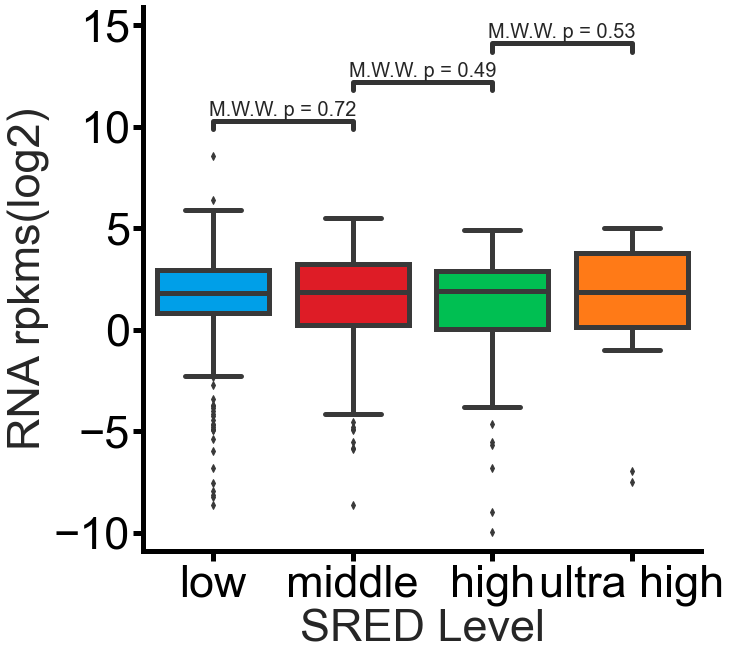

In [8]:
low = infos.loc[infos[3]>0].loc[infos[5]<_thresholds[0]].copy()
middle = infos.loc[infos[3]>0].loc[infos[5]>=_thresholds[0]].loc[infos[5]<_thresholds[1]].copy()
high = infos.loc[infos[3]>0].loc[infos[5]>=_thresholds[1]].loc[infos[5]<_thresholds[2]].copy()
ultra_high = infos.loc[infos[3]>0].loc[infos[5]>=_thresholds[2]].copy()

low["degree"] = "low"
middle["degree"] = "middle"
high["degree"] = "high"
ultra_high["degree"] = "ultra high"

df = pd.concat([low, middle, high, ultra_high])

set_plt()
sns.set_theme(style="whitegrid")

x = "degree"
y = "RNA_rpkms"
ax = sns.boxplot(x=x, y=y, data=df, palette=my_pal, saturation=1, linewidth=figure_size['very_small'])

pairs=[("low", "middle"), ("middle", "high"), ("high", "ultra high")]
annotator = Annotator(ax, pairs, data=df, x=x, y=y)
annotator.configure(
    test='Mann-Whitney', text_format='simple', line_width=figure_size['very_small'], fontsize=figure_size['middle'])
annotator.apply_and_annotate()

sns.despine()
set_Border(plt.gca())
plt.tick_params(colors='black', bottom=True, left=True, labelsize=figure_size['ultra'])
# plt.xticks(rotation=10)
plt.grid(False)

plt.xlabel("SRED Level", fontsize=figure_size['ultra'])
plt.ylabel("RNA rpkms(log2)", fontsize=figure_size['ultra'])

plt.savefig('figure_file/The relationship between RNA and SRED(repress).pdf', format='pdf', bbox_inches = 'tight')
plt.show()

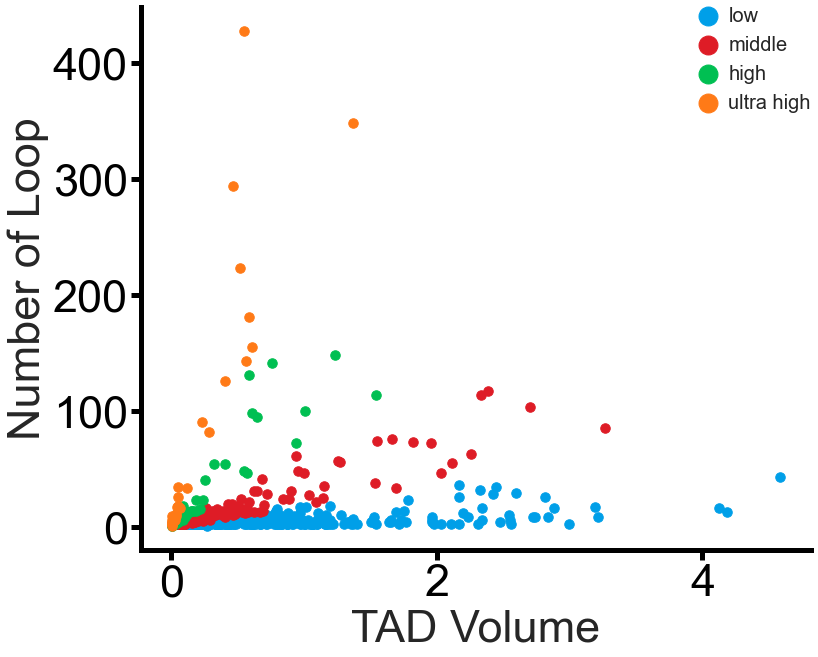

In [9]:
low["TAD Volume"] = low.loc[:, 4]
middle["TAD Volume"] = middle.loc[:, 4]
high["TAD Volume"] = high.loc[:, 4]
ultra_high["TAD Volume"] = ultra_high.loc[:, 4]

low["loop nums"] = low.loc[:, 3]
middle["loop nums"] = middle.loc[:, 3]
high["loop nums"] = high.loc[:, 3]
ultra_high["loop nums"] = ultra_high.loc[:, 3]

pd.concat([low, middle, high, ultra_high]).to_csv('temp/repress_SDRCI.csv')

set_plt(figsize=(12, 10))
fig, axes = plt.subplots(nrows=1, ncols=1, sharey=True)
axes.grid(False)

axes = low.plot.scatter(
    x='TAD Volume', y='loop nums', s=2*figure_size['ultra'], color=my_pal["low"], label='low', ax=axes)
axes = middle.plot.scatter(
    x='TAD Volume', y='loop nums', s=2*figure_size['ultra'], color=my_pal["middle"], label='middle', ax=axes)
axes = high.plot.scatter(
    x='TAD Volume', y='loop nums', s=2*figure_size['ultra'], color=my_pal["high"], label='high', ax=axes)
axes = ultra_high.plot.scatter(
    x='TAD Volume', y='loop nums', s=2*figure_size['ultra'], color=my_pal["ultra high"],
    label='ultra high', ax=axes
)

set_Border(axes)
plt.tick_params(colors='black', bottom=True, left=True)
plt.legend(frameon=False, markerscale=2, handletextpad=0, borderpad=0, borderaxespad=0)
plt.grid(False)

plt.xlabel('TAD Volume')
plt.ylabel('Number of Loop')
plt.savefig('figure_file/The relationship between TAD&Loops&SRED(repress).pdf', format='pdf', bbox_inches='tight')
plt.show()

In [10]:
Gene_table = pd.read_csv("/data1/lmh_data/MINE/source/Gene_table_20211231.txt", sep="\t")
def find_special_tad(df):
    df = df.copy()
    df["score"] = df["TAD Volume"] * df["loop nums"]
    _special = df.sort_values(by="score", ascending=False)[:5].copy()
    for index in _special.index:
        _chr, _start, _end = _special.loc[index][0], _special.loc[index][1], _special.loc[index][2]
        temp = rna_infos.loc[rna_infos["Chromosome"]==_chr[3:]]
        temp = temp.loc[temp["Gene start (bp)"]>=_start].loc[temp["Gene end (bp)"]<=_end]
        geneids = temp["Geneid"].tolist()
        gene_names = set()
        for gene_id in geneids:
            gene_names = gene_names | set(Gene_table.loc[Gene_table["Gene stable ID"]==gene_id]["Gene name"].tolist())
        gene_names -= {np.nan}
        _special.loc[index, "Gene names"] = ','.join(list(gene_names))
    return _special

/home/lmh/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
# find_special_tad(small).to_csv('temp/represses_small(special).csv')
find_special_tad(low)

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,score,Gene names
1178,chr18,36820000,45660000,43,4.586879,1.089762,-1.500218,low,4.586879,43,197.235809,"LINC00907,KIAA1328,RPL7AP66,SETBP1,SETBP1-DT,M..."
1372,chr2,74890000,85060000,34,2.448587,1.187482,3.736622,low,2.448587,34,83.251967,"POLE4,TACR1,EVA1A-AS,LINC01291,TRABD2A,ANKRD11..."
1307,chr2,20650000,27680000,36,2.165051,1.235194,4.517898,low,2.165051,36,77.941851,"DNMT3A,DNAJC27,CCDC121,LDAH,GTF3C2,MAPRE3,PFN4..."
1170,chr18,10520000,12950000,29,2.595370,1.123733,1.633222,low,2.595370,29,75.265731,"CHMP1B,PTPN2,KIAA0895LP1,MIX23P3,NAPG,AFG3L2,G..."
479,chr11,71580000,76150000,32,2.321341,1.180987,3.015876,low,2.321341,32,74.282906,"HMGN2P38,P4HA3,PGM2L1,DEFB131B,DNAJB13,C2CD3,K..."


In [12]:
# find_special_tad(middle).to_csv('temp/represses_middle(special).csv')
find_special_tad(middle)

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,score,Gene names
2497,chr9,6340000,12710000,117,2.382780,1.650104,2.080837,middle,2.382780,117,278.785241,"KDM4C,PRELID3BP11,SNRPEP2,LINC02851,UHRF2,RPL2..."
2598,chr9,115030000,120620000,103,2.699431,1.528757,1.107018,middle,2.699431,103,278.041403,"ASTN2-AS1,CDK5RAP2,TRIM32,RPL10P3,PAPPA,TPT1P9..."
711,chr13,51850000,72710000,85,3.264160,1.379790,1.312719,middle,3.264160,85,277.453601,"HNRNPA3P5,RNU6-80P,CKAP2,SUGT1-DT,LINC00345,ZD..."
1209,chr18,76710000,79380000,114,2.331886,1.644261,-1.540498,middle,2.331886,114,265.835023,"RPL26P35,MBP,ZNF236,ATP9B,ZNF236-DT"
473,chr11,64160000,69100000,63,2.259033,1.416198,3.418018,middle,2.259033,63,142.319048,"TCIRG1,FAM89B,CCDC87,FAM86C2P,TRPT1,EIF1AD,FIB..."


In [13]:
# find_special_tad(high).to_csv('temp/represses_high(special).csv')
find_special_tad(high)

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,score,Gene names
2084,chr5,175460000,179160000,148,1.230640,1.983905,4.314904,high,1.230640,148,182.134763,"PRR7,HRH2,ZNF354B,Y_RNA,PDLIM7-AS1,TSPAN17,DOK..."
821,chr15,25500000,29660000,114,1.542093,1.780467,-1.684803,high,1.542093,114,175.798574,"GABRB3,HERC2,APBA2,WHAMMP2,GOLGA6L7,ATP10A,OCA..."
2489,chr8,135450000,138710000,141,0.755872,2.194185,0.364292,high,0.755872,141,106.577923,KHDRBS3
908,chr15,85850000,88460000,100,1.004319,1.884438,-9.965784,high,1.004319,100,100.431853,NTRK3
1379,chr2,88740000,98390000,131,0.581795,2.242701,3.389207,high,0.581795,131,76.215086,"MIR3127,ZNF514,ANKRD36C,SNRNP200,HMGN1P36,CIAO..."


In [14]:
# find_special_tad(ultra_high).to_csv('temp/represses_ultra_high(special).csv')
find_special_tad(ultra_high)

,0,1,2,3,4,5,RNA_rpkms,degree,TAD Volume,loop nums,score,Gene names
1961,chr5,39570000,52660000,348,1.366225,2.303637,2.418796,ultra high,1.366225,348,475.446167,"PRELID3BP5,AMD1P3,FBXO4,PPIAP77,SELENOP,MRPS30..."
460,chr11,47850000,57270000,427,0.550515,2.967481,-0.215915,ultra high,0.550515,427,235.070002,"TMEM230P2,OR4C6,OR5D17P,PTPRJ,SEPTIN7P11"
2424,chr8,48930000,52010000,294,0.466753,2.806937,-0.672696,ultra high,0.466753,294,137.225457,"PCMTD1,PXDNL"
2422,chr8,42840000,47740000,223,0.516311,2.717293,0.969841,ultra high,0.516311,223,115.137449,"POMK,SPIDR,HGSNAT,RNF170,CEBPD,FNTA,RPL10AP2,H..."
2410,chr8,33480000,36830000,181,0.585778,2.505554,1.315204,ultra high,0.585778,181,106.025871,"LSM12P1,RNF122,MAK16"


In [15]:
scores = [0, 0, 0, 0]
RBM25_chipseq_file_path = '/data1/lmh_data/MINE/source/HepG2/GSM3393550_RBM25_ChIP_HepG2_OPTIMAL_ppr.IDR0.02.filt.narrowPeak'
with open(RBM25_chipseq_file_path, 'r')as f:
    for line in f:
        datas = line.strip().split()
        _chrom, _start, _end = datas[0], datas[1], datas[2]
        _tad = infos.loc[infos[3]>0].loc[infos[0]==_chrom].loc[infos[1]<=int(_start)].loc[infos[2]>=int(_end)]
        if _tad.loc[:,5].mean() > 0 and _tad.loc[:,5].mean() < _thresholds[0]:
            scores[0] += 1/_tad.loc[:,4].mean()
        elif _tad.loc[:,5].mean() > _thresholds[0] and _tad.loc[:,5].mean() < _thresholds[1]:
            scores[1] += 1/_tad.loc[:,4].mean()
        elif _tad.loc[:,5].mean() > _thresholds[1] and _tad.loc[:,5].mean() < _thresholds[2]:
            scores[2] += 1/_tad.loc[:,4].mean()
        elif _tad.loc[:,5].mean() > _thresholds[2]:
            scores[3] += 1/_tad.loc[:,4].mean()

print(scores)

[14663.542896631323, 19593.256358338705, 13879.356936376766, 10331.866195571916]
